In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import db_utils
from dataset_utils import load_dataset

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
datasets = [
    'MNIST-SMALL',
    'COIL20',
    'COUNTRY-2014',
    'BREAST-CANCER95',
    'MPI',
    'DIABETES'
]

dataset_name = 'MNIST-SMALL'
embedding_dir = './output/{}'.format(dataset_name)
X, y, labels = load_dataset(dataset_name)

Loading dataset: MNIST-SMALL


In [14]:
# load calculated embedding for different value of perplexity
import joblib
import os

embeddings = []
perps = []

for file in os.listdir(embedding_dir):
    if file.endswith('.z'):
        in_name = os.path.join(embedding_dir, file)
        tsne_obj = joblib.load(in_name)
        embeddings.append(tsne_obj.embedding_.ravel())
        perps.append(tsne_obj.get_params()['perplexity'])
        
embeddings = np.array(embeddings)

In [25]:
print(len(perps), embeddings.shape)

898 (898, 3594)


In [23]:
# find the most closed perplexity to the given rounded value
# e.g, given `rounded_perp = 5`, return `real_perp = 5.014803659274878`

def _approximated_closed(rounded_perp):
    # always return the closet real_perp
    diff = [abs(real_perp - rounded_perp) for real_perp in perps]
    idx = diff.index(min(diff))
    return perps[idx]

In [24]:
_approximated_closed(5)

5.014803659274878

In [38]:
def _scatter(ax, rounded_perp_val):
    perp_val = _approximated_closed(rounded_perp_val)
    idx = perps.index(perp_val)
    emb = embeddings[idx].reshape(-1,2)
    ax.scatter(emb[:, 0], emb[:, 1], c=y, alpha=0.3, cmap='tab10')
    ax.axes.set_xlabel('perplexity={}'.format(rounded_perp_val))
    ax.set_xticklabels([])
    ax.tick_params('x', length=0)
    ax.get_yaxis().set_visible(False)

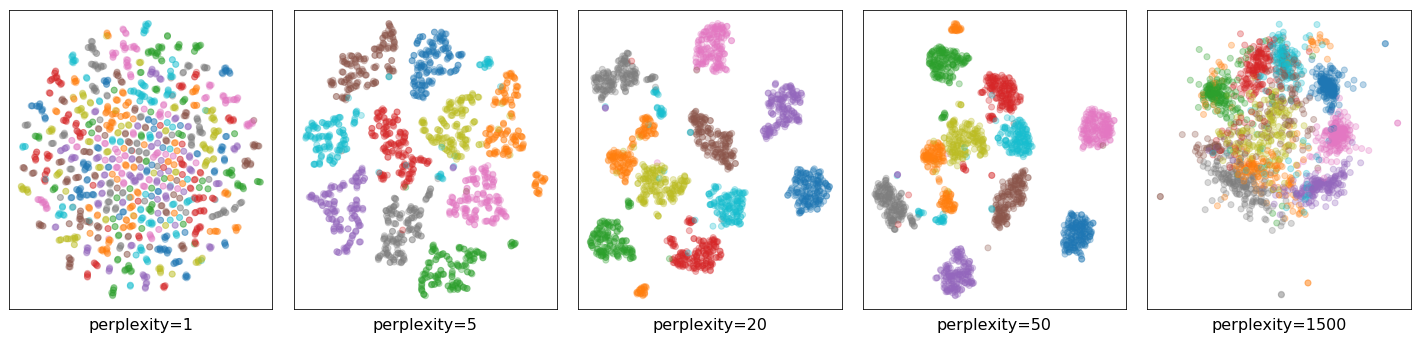

In [39]:
rounded_perp_vals = [1, 5, 20, 50, 1500]

fig, axes = plt.subplots(1, len(rounded_perp_vals), figsize=(20,5))

for i, rounded_perp_val in enumerate(rounded_perp_vals):
    ax = axes[i]
    _scatter(ax, rounded_perp_val)

plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.savefig('./plots/{}_examples.pdf'.format(dataset_name))

In [40]:
### Explain DR methods from raw data to viz